# Get the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import time

current_time = round(time.time())
print(current_time)

1607053335


min(df["date"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S').split()[0]))

In [5]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"symbol":"ABBV","from":1357137000,"to":1606987541,"events":"div, split","interval":"1m","region":"US"}

headers = {
    'x-rapidapi-key': "eb056a72f9msh2564512806e6aebp12a874jsnd03d93885916",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
results=response.json()
print(response.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"ABBV","exchangeName":"NYQ","instrumentType":"EQUITY","firstTradeDate":1357137000,"regularMarketTime":1607029330,"gmtoffset":-18000,"timezone":"EST","exchangeTimezoneName":"America/New_York","regularMarketPrice":104.74,"chartPreviousClose":35.12,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EST","start":1606986000,"end":1607005800,"gmtoffset":-18000},"regular":{"timezone":"EST","start":1607005800,"end":1607029200,"gmtoffset":-18000},"post":{"timezone":"EST","start":1607029200,"end":1607043600,"gmtoffset":-18000}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[1357137000,1357223400,1357309800,1357569000,1357655400,1357741800,1357828200,1357914600,1358173800,1358260200,1358346600,1358433000,1358519400,1358865000,1358951400,1359037800,1359124200,1359383400,1359469800,1359556200,1359642600,1359729000,1359988200,1360074600,1360161000,1360247400,1360

In [6]:
len(results["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"])

1995

In [7]:
import pandas as pd
timestamp=[]
open=[]
high=[]
low=[]
close=[]
volume=[]
adjclose=[]

for i in range(len(results["chart"]["result"][0]["timestamp"])):
    timestamp.append(results["chart"]["result"][0]["timestamp"][i])
    open.append(results["chart"]["result"][0]["indicators"]["quote"][0]["open"][i])
    high.append(results["chart"]["result"][0]["indicators"]["quote"][0]["high"][i])
    low.append(results["chart"]["result"][0]["indicators"]["quote"][0]["low"][i])
    close.append(results["chart"]["result"][0]["indicators"]["quote"][0]["close"][i])
    volume.append(results["chart"]["result"][0]["indicators"]["quote"][0]["volume"][i])
    adjclose.append(results["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"][i])

df=pd.DataFrame({"timestamp":timestamp,"open":open,"high":high,"low":low,"close":close,"volume":volume,"adjclose":adjclose})
    

In [8]:
df.head()

,timestamp,open,high,low,close,volume,adjclose
0,1357137000,34.919998,35.400002,34.099998,35.119999,13767900,25.027666
1,1357223400,35.000000,35.000000,34.160000,34.830002,16739300,24.821001
2,1357309800,34.619999,34.889999,34.250000,34.389999,21372100,24.507444
3,1357569000,34.150002,35.450001,34.150002,34.459999,17897100,24.557327
4,1357655400,34.290001,34.639999,33.360001,33.709999,17863300,24.022856


In [9]:
import datetime
df["timestamp"]=df["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d hh:mm:ss').split()[0])

df=df.set_index("timestamp")

In [10]:
df.head(8000)

,timestamp,open,high,low,close,volume,adjclose
0,2013-01-02,34.919998,35.400002,34.099998,35.119999,13767900,25.027666
1,2013-01-03,35.000000,35.000000,34.160000,34.830002,16739300,24.821001
2,2013-01-04,34.619999,34.889999,34.250000,34.389999,21372100,24.507444
3,2013-01-07,34.150002,35.450001,34.150002,34.459999,17897100,24.557327
4,2013-01-08,34.290001,34.639999,33.360001,33.709999,17863300,24.022856
...,...,...,...,...,...,...,...
1990,2020-11-25,103.820000,104.459999,103.389999,104.199997,6368100,104.199997
1991,2020-11-27,104.980003,105.800003,104.300003,104.889999,4418800,104.889999
1992,2020-11-30,105.120003,105.419998,103.650002,104.580002,20726500,104.580002
1993,2020-12-01,105.050003,106.379997,104.040001,104.040001,7625100,104.040001


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1995 non-null   object 
 1   open       1995 non-null   float64
 2   high       1995 non-null   float64
 3   low        1995 non-null   float64
 4   close      1995 non-null   float64
 5   volume     1995 non-null   int64  
 6   adjclose   1995 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 109.2+ KB


In [12]:
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1995 non-null   datetime64[ns]
 1   open       1995 non-null   float64       
 2   high       1995 non-null   float64       
 3   low        1995 non-null   float64       
 4   close      1995 non-null   float64       
 5   volume     1995 non-null   int64         
 6   adjclose   1995 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 109.2 KB


In [14]:
df.head()

,timestamp,open,high,low,close,volume,adjclose
0,2013-01-02,34.919998,35.400002,34.099998,35.119999,13767900,25.027666
1,2013-01-03,35.000000,35.000000,34.160000,34.830002,16739300,24.821001
2,2013-01-04,34.619999,34.889999,34.250000,34.389999,21372100,24.507444
3,2013-01-07,34.150002,35.450001,34.150002,34.459999,17897100,24.557327
4,2013-01-08,34.290001,34.639999,33.360001,33.709999,17863300,24.022856


In [15]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dtype: int64

In [18]:
len(df)

1995

In [19]:
df=df.set_index("timestamp")

In [20]:
df.head()

,open,high,low,close,volume,adjclose
timestamp,,,,,,
2013-01-02,34.919998,35.400002,34.099998,35.119999,13767900,25.027666
2013-01-03,35.000000,35.000000,34.160000,34.830002,16739300,24.821001
2013-01-04,34.619999,34.889999,34.250000,34.389999,21372100,24.507444
2013-01-07,34.150002,35.450001,34.150002,34.459999,17897100,24.557327
2013-01-08,34.290001,34.639999,33.360001,33.709999,17863300,24.022856


In [21]:
df.loc['2014-08-07']

open        5.159000e+01
high        5.271000e+01
low         5.142000e+01
close       5.243000e+01
volume      1.717170e+07
adjclose    3.981370e+01
Name: 2014-08-07 00:00:00, dtype: float64

# Examine and prepare

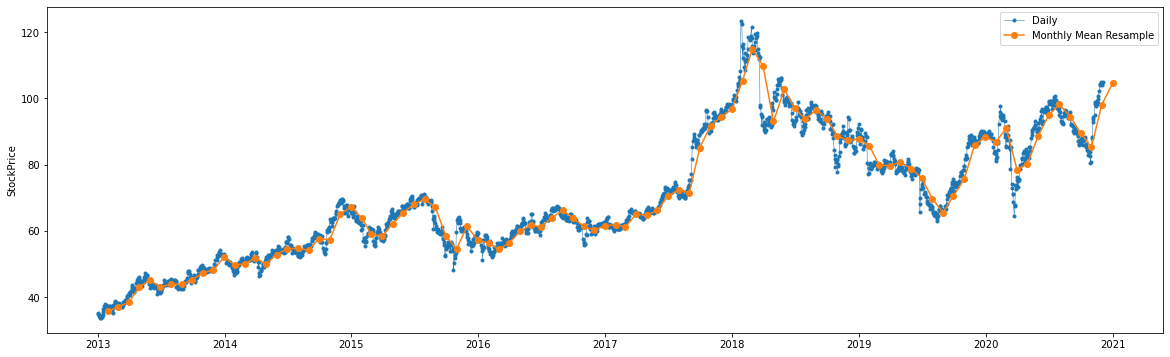

In [22]:
#Visualize de Data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

y=df["close"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('M').mean(),marker='o', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('StockPrice')
ax.legend();

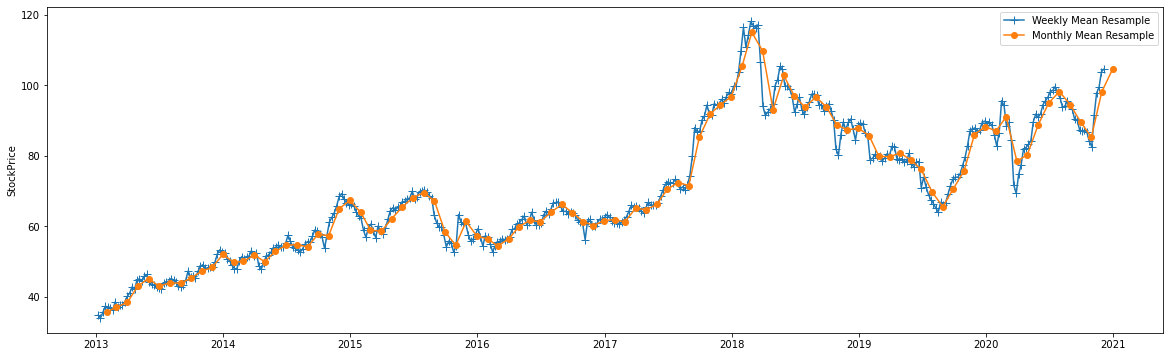

In [23]:
y=df["close"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y.resample('W').mean(),marker='+', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(y.resample('M').mean(),marker='o', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('StockPrice')
ax.legend();

In [24]:
# Decompose the Data
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [25]:
y_W=y.resample('W').mean()

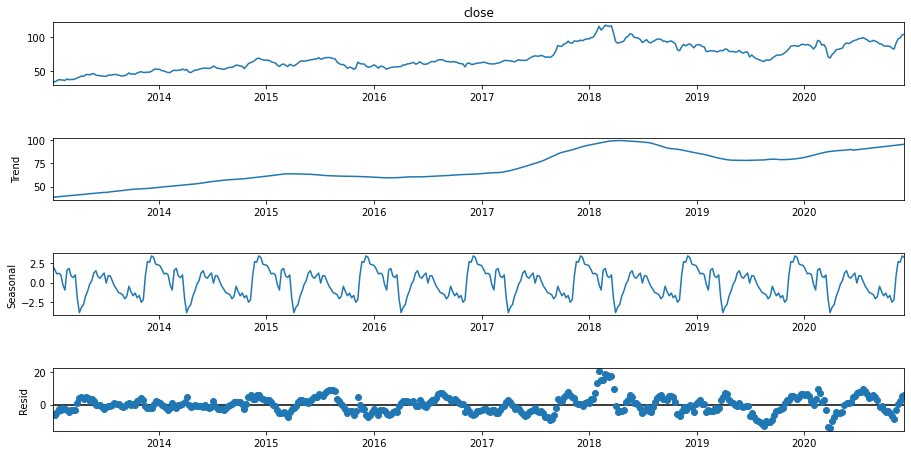

In [26]:
seasonal_decompose(y_W)

In [27]:
#Test for stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

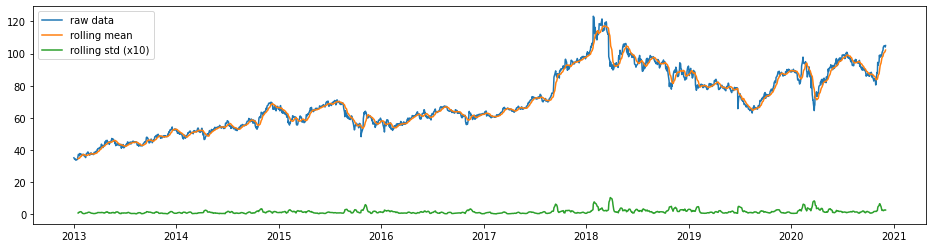

In [28]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [29]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [30]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.632
P-value = 0.466
Critical values :
	1%: -3.4336603168110695 - The data is not stationary with 99% confidence
	5%: -2.8630023108088545 - The data is not stationary with 95% confidence
	10%: -2.5675484732666 - The data is not stationary with 90% confidence


In [31]:
#Make the data stationary
#detrending
y_detrend =  (y- y.rolling(window=12).mean())/y.rolling(window=12).std()

 > Is the de-trended data stationary ?
Test statistic = -14.934
P-value = 0.000
Critical values :
	1%: -3.4336519592295947 - The data is  stationary with 99% confidence
	5%: -2.862998620943585 - The data is  stationary with 95% confidence
	10%: -2.567546508593341 - The data is  stationary with 90% confidence


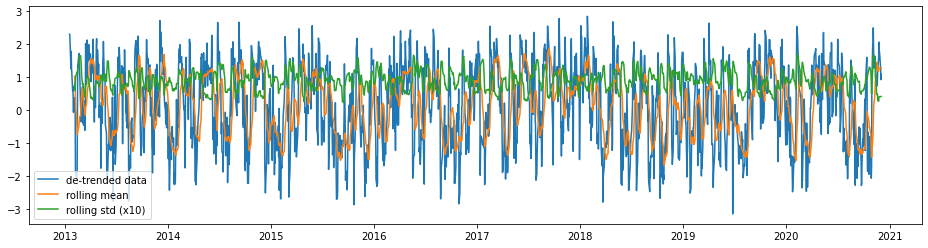

In [32]:
test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

In [33]:
y_detrend.dropna()

timestamp
2013-01-17   2.30509376
2013-01-18   2.28041021
2013-01-22   1.25112902
2013-01-23   1.78958786
2013-01-24   1.28402227
                ...    
2020-11-25   1.84566129
2020-11-27   1.66643474
2020-11-30   1.28263288
2020-12-01   0.92710413
2020-12-02   1.09153084
Name: close, Length: 1984, dtype: float64

 > Is the 12 lag differenced data stationary ?
Test statistic = -6.787
P-value = 0.000
Critical values :
	1%: -3.4336975984464764 - The data is  stationary with 99% confidence
	5%: -2.8630187704944223 - The data is  stationary with 95% confidence
	10%: -2.567557237266907 - The data is  stationary with 90% confidence


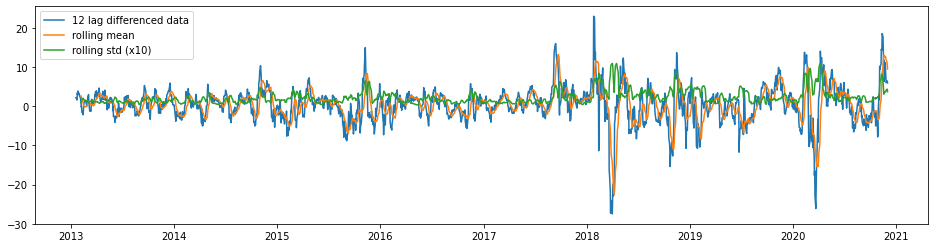

In [34]:
#Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

In [35]:
y_12lag.dropna()

timestamp
2013-01-18   2.20000076
2013-01-22   1.58999634
2013-01-23   3.40999985
2013-01-24   3.00000000
2013-01-25   3.88999939
                ...    
2020-11-25   9.07999420
2020-11-27   6.01999664
2020-11-30   6.43000031
2020-12-01   6.44000244
2020-12-02   5.94999695
Name: close, Length: 1983, dtype: float64

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -10.066
P-value = 0.000
Critical values :
	1%: -3.4337148236767336 - The data is  stationary with 99% confidence
	5%: -2.863026375292069 - The data is  stationary with 95% confidence
	10%: -2.5675612864716304 - The data is  stationary with 90% confidence


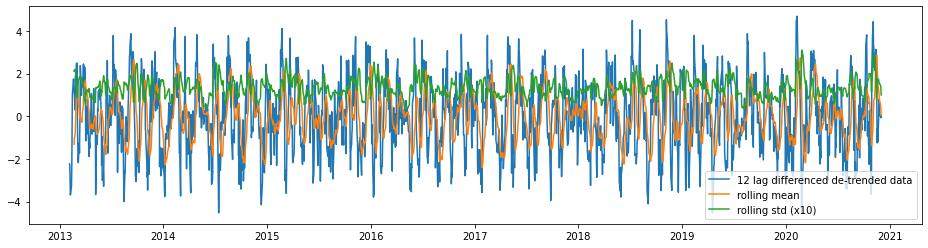

In [36]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

In [37]:
y_12lag_detrend.dropna()

timestamp
2013-02-05   -2.23623476
2013-02-06   -2.32808375
2013-02-07   -3.17106507
2013-02-08   -3.69474237
2013-02-11   -3.34474384
                 ...    
2020-11-25    0.43123789
2020-11-27    0.02613599
2020-11-30    0.02151896
2020-12-01   -0.07181895
2020-12-02    0.01393571
Name: close, Length: 1972, dtype: float64

#Create training and test datasets
y=y_12lag_detrend.dropna()

In [38]:
y_12lag_detrend.dropna()

timestamp
2013-02-05   -2.23623476
2013-02-06   -2.32808375
2013-02-07   -3.17106507
2013-02-08   -3.69474237
2013-02-11   -3.34474384
                 ...    
2020-11-25    0.43123789
2020-11-27    0.02613599
2020-11-30    0.02151896
2020-12-01   -0.07181895
2020-12-02    0.01393571
Name: close, Length: 1972, dtype: float64

y=pd.DataFrame(y)

In [39]:
dates_to_predict=[]
start = datetime.datetime.strptime("1986-03-13", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-03", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_to_predict.append(date.strftime("%Y-%m-%d"))

In [40]:
y

timestamp
2013-01-02    35.11999893
2013-01-03    34.83000183
2013-01-04    34.38999939
2013-01-07    34.45999908
2013-01-08    33.70999908
                 ...     
2020-11-25   104.19999695
2020-11-27   104.88999939
2020-11-30   104.58000183
2020-12-01   104.04000092
2020-12-02   104.98999786
Name: close, Length: 1995, dtype: float64

y.loc['1986-04-16']

In [42]:
y_to_train = y[:'2019-12-03']
y_to_val = y['2019-12-03':] # last X months for test  
predict_date = len(y) - len(y[:'2019-12-03'])# dataset to train

In [43]:
y=pd.DataFrame(y)

In [44]:
y_to_train

timestamp
2013-01-02   35.11999893
2013-01-03   34.83000183
2013-01-04   34.38999939
2013-01-07   34.45999908
2013-01-08   33.70999908
                 ...    
2019-11-26   87.72000122
2019-11-27   88.33000183
2019-11-29   87.73000336
2019-12-02   87.02999878
2019-12-03   85.94999695
Name: close, Length: 1743, dtype: float64

In [45]:
y_to_val

timestamp
2019-12-03    85.94999695
2019-12-04    87.19999695
2019-12-05    86.72000122
2019-12-06    86.98000336
2019-12-09    86.44000244
                 ...     
2020-11-25   104.19999695
2020-11-27   104.88999939
2020-11-30   104.58000183
2020-12-01   104.04000092
2020-12-02   104.98999786
Name: close, Length: 253, dtype: float64

In [46]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [47]:
sarima_grid_search(y,12)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:6849.1428379432455


In [48]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8696      0.063    -13.804      0.000      -0.993      -0.746
ma.L1          1.1096      0.070     15.766      0.000       0.972       1.248
ar.S.L12      -0.3446      0.180     -1.919      0.055      -0.697       0.007
ma.S.L12       0.4207      0.173      2.438      0.015       0.083       0.759
sigma2         1.5018      0.191      7.879      0.000       1.128       1.875


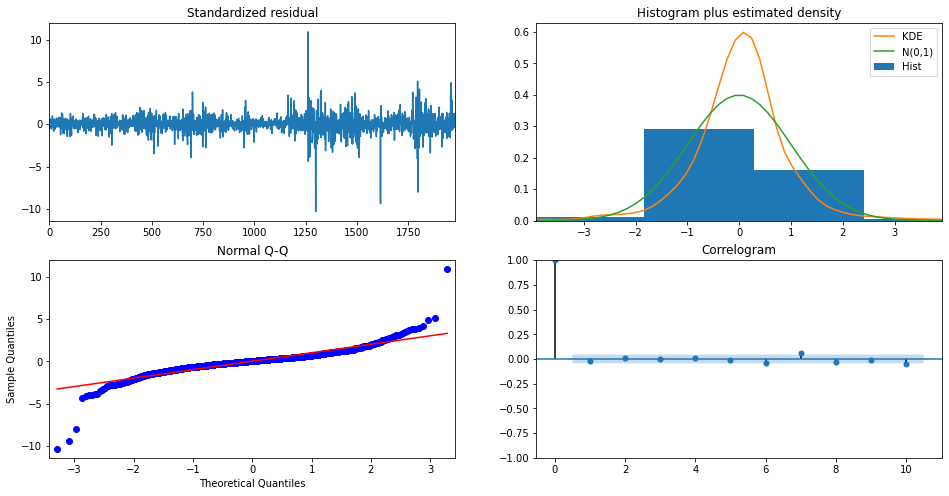

In [49]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [50]:
import sklearn
from sklearn.metrics import r2_score
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results=mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted)
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted_dynamic)
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')

    plt.legend()
    plt.show()
    
    return (results)

import sklearn
from sklearn.metrics import r2_score
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results=mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted)
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')
    plt.legend()
    plt.show()
    
    return (results)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8696      0.063    -13.804      0.000      -0.993      -0.746
ma.L1          1.1096      0.070     15.766      0.000       0.972       1.248
ar.S.L12      -0.3446      0.180     -1.919      0.055      -0.697       0.007
ma.S.L12       0.4207      0.173      2.438      0.015       0.083       0.759
sigma2         1.5018      0.191      7.879      0.000       1.128       1.875


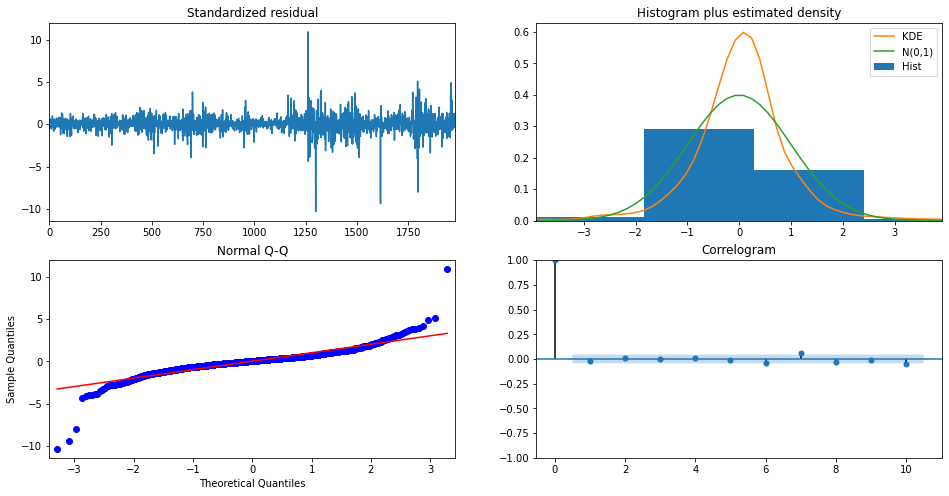

The Root Mean Squared Error of SARIMA with season_length=365 and dynamic = False 1.83
The R2 of the model is:  0.9367312206510717


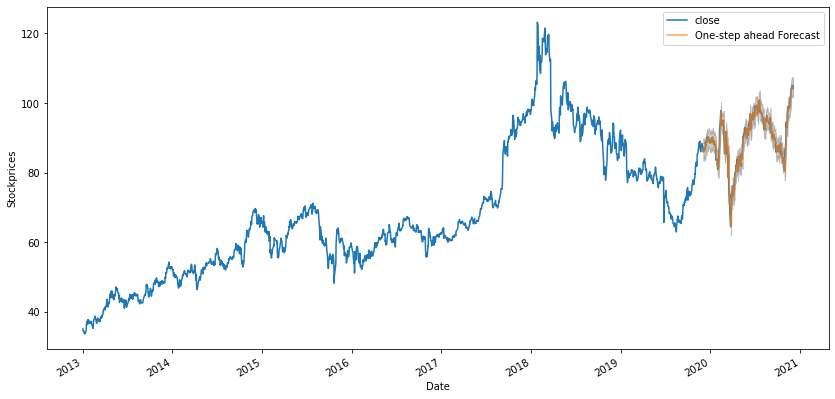

The Root Mean Squared Error of SARIMA with season_length=365 and dynamic = True 7.74
The R2 of the model is:  -0.13412460558322437


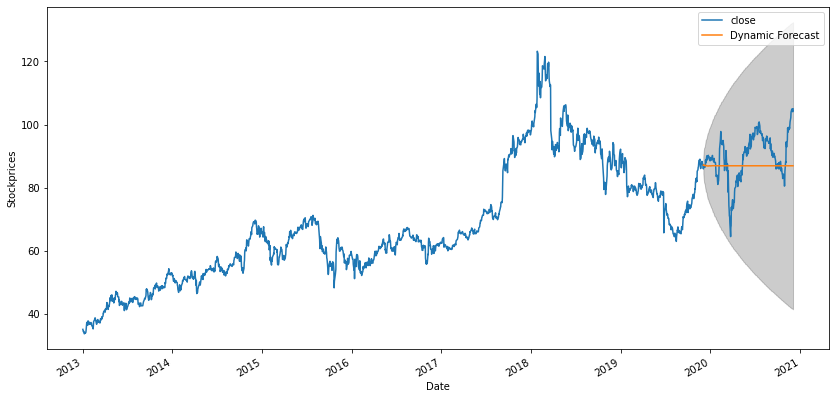

In [51]:
model=sarima_eva(y,(1, 1, 1),(1, 0, 1, 12),365,'2019-12-03',y_to_val)

# Forecasting

Some of the values are missing and therefore removed from the index, thus, there is no clear frequency in the index. We will need to reset the index so that we are able to do the forecasting.

In [143]:
y=y.reset_index()

In [144]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps,dynamic=False)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int(dynamic=False)
    #print(pred_ci)
    ax = y.close.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel("close")

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    display(pci)
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

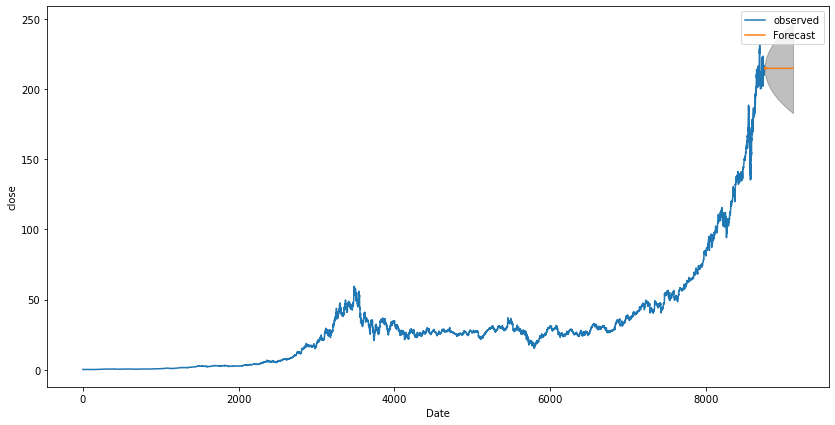

,Date,Lower Bound,Upper Bound
0,8754,213.70078975,217.63511375
1,8755,212.94326767,217.91806986
2,8756,212.28691786,218.26288457
3,8757,211.76888370,218.56251733
4,8758,210.89142580,218.42467407
...,...,...,...
360,9114,183.22048110,246.77301987
361,9115,183.17649309,246.81700786
362,9116,183.13256581,246.86093512
363,9117,183.08869900,246.90480191


,Date,Predicted_Mean,Lower Bound,Upper Bound
0,8754,215.66795175,213.70078975,217.63511375
1,8755,215.43066877,212.94326767,217.91806986
2,8756,215.27490121,212.28691786,218.26288457
3,8757,215.16570051,211.76888370,218.56251733
4,8758,214.65804994,210.89142580,218.42467407


In [145]:
final_table = forecast(model,365,y)
final_table.head()

The final table comprises the predicted values, as well as the lower and upper bound which reflect the confidence interval in which are predictions are.

In [ ]:
final_table.head()

In [ ]:
import datetime

dates_to_predict=[]
start = datetime.datetime.strptime("2020-12-03", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-03", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_to_predict.append(date.strftime("%Y-%m-%d"))

In [ ]:
final_table["Date"]=dates_to_predict

In [ ]:
final_table.head()

In [ ]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    final_table.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

In [ ]:
len(df)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()